Setup Spark on Colab environment.  Run the two cells below!

In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null
!wget -q https://archive.apache.org/dist/spark/spark-3.3.2/spark-3.3.2-bin-hadoop2.tgz
!tar xf spark-3.3.2-bin-hadoop2.tgz

In [ ]:
!pip install -q findspark

import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.3.2-bin-hadoop2"

import findspark
findspark.init("spark-3.3.2-bin-hadoop2")# SPARK_HOME

import pyspark
from pyspark.sql import *
from pyspark.sql.functions import *
from pyspark import SparkContext, SparkConf

sc = SparkContext.getOrCreate()
spark = SparkSession.builder.getOrCreate()

In [ ]:
!wget http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
!unzip ml-latest-small.zip

--2023-04-09 05:20:09--  http://files.grouplens.org/datasets/movielens/ml-latest-small.zip
Resolving files.grouplens.org (files.grouplens.org)... 128.101.65.152
Connecting to files.grouplens.org (files.grouplens.org)|128.101.65.152|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 978202 (955K) [application/zip]
Saving to: ‘ml-latest-small.zip’

ml-latest-small.zip 100%[===================>] 955.28K  4.53MB/s    in 0.2s    

2023-04-09 05:20:09 (4.53 MB/s) - ‘ml-latest-small.zip’ saved [978202/978202]

Archive:  ml-latest-small.zip
   creating: ml-latest-small/
  inflating: ml-latest-small/links.csv  
  inflating: ml-latest-small/tags.csv  
  inflating: ml-latest-small/ratings.csv  
  inflating: ml-latest-small/README.txt  
  inflating: ml-latest-small/movies.csv  


In [ ]:
ratings = spark.read.csv("ml-latest-small/ratings.csv", header=True)
movies = spark.read.csv("ml-latest-small/movies.csv", header=True)

Check the schema:

In [ ]:
ratings.printSchema()
movies.printSchema()

root
 |-- userId: string (nullable = true)
 |-- movieId: string (nullable = true)
 |-- rating: string (nullable = true)
 |-- timestamp: string (nullable = true)

root
 |-- movieId: string (nullable = true)
 |-- title: string (nullable = true)
 |-- genres: string (nullable = true)



Get a sample with `take()`:

In [ ]:
ratings.take(3)

[Row(userId='1', movieId='1', rating='4.0', timestamp='964982703'),
 Row(userId='1', movieId='3', rating='4.0', timestamp='964981247'),
 Row(userId='1', movieId='6', rating='4.0', timestamp='964982224')]

Get a formatted sample with `show()`:

In [ ]:
ratings.show()

+------+-------+------+---------+
|userId|movieId|rating|timestamp|
+------+-------+------+---------+
|     1|      1|   4.0|964982703|
|     1|      3|   4.0|964981247|
|     1|      6|   4.0|964982224|
|     1|     47|   5.0|964983815|
|     1|     50|   5.0|964982931|
|     1|     70|   3.0|964982400|
|     1|    101|   5.0|964980868|
|     1|    110|   4.0|964982176|
|     1|    151|   5.0|964984041|
|     1|    157|   5.0|964984100|
|     1|    163|   5.0|964983650|
|     1|    216|   5.0|964981208|
|     1|    223|   3.0|964980985|
|     1|    231|   5.0|964981179|
|     1|    235|   4.0|964980908|
|     1|    260|   5.0|964981680|
|     1|    296|   3.0|964982967|
|     1|    316|   3.0|964982310|
|     1|    333|   5.0|964981179|
|     1|    349|   4.0|964982563|
+------+-------+------+---------+
only showing top 20 rows



In [ ]:
movies.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

In [ ]:
print("In total there are {0} movies".format(movies.count()))

In total there are 9742 movies


In [ ]:
# How many ratings are there for each movie id?
# Sort descending by the count of ratings.
# Do not use SQL for this cell.
movie_counts = ratings.groupBy('movieid').count().orderBy('count', ascending=False).show()

+-------+-----+
|movieid|count|
+-------+-----+
|    356|  329|
|    318|  317|
|    296|  307|
|    593|  279|
|   2571|  278|
|    260|  251|
|    480|  238|
|    110|  237|
|    589|  224|
|    527|  220|
|   2959|  218|
|      1|  215|
|   1196|  211|
|     50|  204|
|   2858|  204|
|     47|  203|
|    780|  202|
|    150|  201|
|   1198|  200|
|   4993|  198|
+-------+-----+
only showing top 20 rows



Expected result:

<pre>
+-------+---+
|movieid|cnt|
+-------+---+
|    356|329|
|    318|317|
|    296|307|
|    593|279|
|   2571|278|
|    260|251|
|    480|238|
|    110|237|
|    589|224|
|    527|220|
|   2959|218|
|      1|215|
|   1196|211|
|   2858|204|
|     50|204|
|     47|203|
|    780|202|
|    150|201|
|   1198|200|
|   4993|198|
+-------+---+
only showing top 20 rows
</pre>

In [ ]:
# Register the ratings and movies dataframes as tables
# so that we can execute sql queries on them.
ratings.registerTempTable("ratings_table")
movies.registerTempTable("movies_table")

/content/spark-3.3.2-bin-hadoop2/python/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


In [ ]:
# Use SQL
# How many ratings are there for each movie id?
# Sort descending by the count of ratings.
table = spark.sql("select movieid, count(movieId) as count from ratings_table group by movieId order by count DESC")
table.show()

+-------+-----+
|movieid|count|
+-------+-----+
|    356|  329|
|    318|  317|
|    296|  307|
|    593|  279|
|   2571|  278|
|    260|  251|
|    480|  238|
|    110|  237|
|    589|  224|
|    527|  220|
|   2959|  218|
|      1|  215|
|   1196|  211|
|     50|  204|
|   2858|  204|
|     47|  203|
|    780|  202|
|    150|  201|
|   1198|  200|
|   4993|  198|
+-------+-----+
only showing top 20 rows



Expected result: same as before.

In [ ]:
# Use SQL
# Find the average rating for each movie that has more than 50 ratings.
# Sort descending by average rating.

table1 = spark.sql("select r.movieId, title, avg(rating) as avgrating" +
" from ratings_table r join movies_table m on r.movieId == m.movieId group by r.movieId, title" +
 " having count(rating)>=50 order by avgrating DESC")

table1.show()

+-------+--------------------+------------------+
|movieId|               title|         avgrating|
+-------+--------------------+------------------+
|    318|Shawshank Redempt...| 4.429022082018927|
|    858|Godfather, The (1...|         4.2890625|
|   2959|   Fight Club (1999)| 4.272935779816514|
|   1276|Cool Hand Luke (1...| 4.271929824561403|
|    750|Dr. Strangelove o...| 4.268041237113402|
|    904|  Rear Window (1954)| 4.261904761904762|
|   1221|Godfather: Part I...|  4.25968992248062|
|  48516|Departed, The (2006)| 4.252336448598131|
|   1213|   Goodfellas (1990)|              4.25|
|    912|   Casablanca (1942)|              4.24|
|  58559|Dark Knight, The ...| 4.238255033557047|
|     50|Usual Suspects, T...| 4.237745098039215|
|   1197|Princess Bride, T...| 4.232394366197183|
|    260|Star Wars: Episod...| 4.231075697211155|
|    527|Schindler's List ...|             4.225|
|   1208|Apocalypse Now (1...| 4.219626168224299|
|   2329|American History ...| 4.217054263565892|


Expected result:

<pre>
+-------+--------------------+------------------+
|movieId|               title|         avgrating|
+-------+--------------------+------------------+
|    318|Shawshank Redempt...| 4.429022082018927|
|    858|Godfather, The (1...|         4.2890625|
|   2959|   Fight Club (1999)| 4.272935779816514|
|   1276|Cool Hand Luke (1...| 4.271929824561403|
|    750|Dr. Strangelove o...| 4.268041237113402|
|    904|  Rear Window (1954)| 4.261904761904762|
|   1221|Godfather: Part I...|  4.25968992248062|
|  48516|Departed, The (2006)| 4.252336448598131|
|   1213|   Goodfellas (1990)|              4.25|
|    912|   Casablanca (1942)|              4.24|
|  58559|Dark Knight, The ...| 4.238255033557047|
|     50|Usual Suspects, T...| 4.237745098039215|
|   1197|Princess Bride, T...| 4.232394366197183|
|    260|Star Wars: Episod...| 4.231075697211155|
|    527|Schindler's List ...|             4.225|
|   1208|Apocalypse Now (1...| 4.219626168224299|
|   2329|American History ...| 4.217054263565892|
|   1196|Star Wars: Episod...|4.2156398104265405|
|   1252|    Chinatown (1974)| 4.211864406779661|
|   1198|Raiders of the Lo...|            4.2075|
+-------+--------------------+------------------+
only showing top 20 rows
</pre>

In [ ]:
movies.show()

+-------+--------------------+--------------------+
|movieId|               title|              genres|
+-------+--------------------+--------------------+
|      1|    Toy Story (1995)|Adventure|Animati...|
|      2|      Jumanji (1995)|Adventure|Childre...|
|      3|Grumpier Old Men ...|      Comedy|Romance|
|      4|Waiting to Exhale...|Comedy|Drama|Romance|
|      5|Father of the Bri...|              Comedy|
|      6|         Heat (1995)|Action|Crime|Thri...|
|      7|      Sabrina (1995)|      Comedy|Romance|
|      8| Tom and Huck (1995)|  Adventure|Children|
|      9| Sudden Death (1995)|              Action|
|     10|    GoldenEye (1995)|Action|Adventure|...|
|     11|American Presiden...|Comedy|Drama|Romance|
|     12|Dracula: Dead and...|       Comedy|Horror|
|     13|        Balto (1995)|Adventure|Animati...|
|     14|        Nixon (1995)|               Drama|
|     15|Cutthroat Island ...|Action|Adventure|...|
|     16|       Casino (1995)|         Crime|Drama|
|     17|Sen

In [ ]:
# Here we want to extract the genres from the movies table.
# This can be done easily using the underlying RDD of the movies dataframe.

rdd_movies = movies.rdd
movie_genre = rdd_movies.map(lambda line: (line[0],line[2]))
movie_genre.take(20)

[('1', 'Adventure|Animation|Children|Comedy|Fantasy'),
 ('2', 'Adventure|Children|Fantasy'),
 ('3', 'Comedy|Romance'),
 ('4', 'Comedy|Drama|Romance'),
 ('5', 'Comedy'),
 ('6', 'Action|Crime|Thriller'),
 ('7', 'Comedy|Romance'),
 ('8', 'Adventure|Children'),
 ('9', 'Action'),
 ('10', 'Action|Adventure|Thriller'),
 ('11', 'Comedy|Drama|Romance'),
 ('12', 'Comedy|Horror'),
 ('13', 'Adventure|Animation|Children'),
 ('14', 'Drama'),
 ('15', 'Action|Adventure|Romance'),
 ('16', 'Crime|Drama'),
 ('17', 'Drama|Romance'),
 ('18', 'Comedy'),
 ('19', 'Comedy'),
 ('20', 'Action|Comedy|Crime|Drama|Thriller')]

Expected result (showing 20 elements only):

<pre>
[('1', 'Adventure|Animation|Children|Comedy|Fantasy'),
 ('2', 'Adventure|Children|Fantasy'),
 ('3', 'Comedy|Romance'),
 ('4', 'Comedy|Drama|Romance'),
 ('5', 'Comedy'),
 ('6', 'Action|Crime|Thriller'),
 ('7', 'Comedy|Romance'),
 ('8', 'Adventure|Children'),
 ('9', 'Action'),
 ('10', 'Action|Adventure|Thriller'),
 ('11', 'Comedy|Drama|Romance'),
 ('12', 'Comedy|Horror'),
 ('13', 'Adventure|Animation|Children'),
 ('14', 'Drama'),
 ('15', 'Action|Adventure|Romance'),
 ('16', 'Crime|Drama'),
 ('17', 'Drama|Romance'),
 ('18', 'Comedy'),
 ('19', 'Comedy'),
 ('20', 'Action|Comedy|Crime|Drama|Thriller')]
</pre>

In [ ]:
# Now we want to create a flattened out RDD of (movieId, genre) pairs.
# Use flatMapValues on the previous RDD.
# Call the result RDD: moviegenres_flat_rdd

moviegenres_flat_rdd = rdd_movies.map(lambda line: (line[0],line[2].split('|'))).flatMapValues(lambda x:x)
moviegenres_flat_rdd.take(20)

[('1', 'Adventure'),
 ('1', 'Animation'),
 ('1', 'Children'),
 ('1', 'Comedy'),
 ('1', 'Fantasy'),
 ('2', 'Adventure'),
 ('2', 'Children'),
 ('2', 'Fantasy'),
 ('3', 'Comedy'),
 ('3', 'Romance'),
 ('4', 'Comedy'),
 ('4', 'Drama'),
 ('4', 'Romance'),
 ('5', 'Comedy'),
 ('6', 'Action'),
 ('6', 'Crime'),
 ('6', 'Thriller'),
 ('7', 'Comedy'),
 ('7', 'Romance'),
 ('8', 'Adventure')]

Expected result (showing 20 elements only):

<pre>
[('1', 'Adventure'),
 ('1', 'Animation'),
 ('1', 'Children'),
 ('1', 'Comedy'),
 ('1', 'Fantasy'),
 ('2', 'Adventure'),
 ('2', 'Children'),
 ('2', 'Fantasy'),
 ('3', 'Comedy'),
 ('3', 'Romance'),
 ('4', 'Comedy'),
 ('4', 'Drama'),
 ('4', 'Romance'),
 ('5', 'Comedy'),
 ('6', 'Action'),
 ('6', 'Crime'),
 ('6', 'Thriller'),
 ('7', 'Comedy'),
 ('7', 'Romance'),
 ('8', 'Adventure')]
</pre>

In [ ]:
# Now convert the last RDD into a dataframe for further analytics.
moviegenres = spark.createDataFrame(moviegenres_flat_rdd).toDF("movieId", "genre")
moviegenres.show()

# # Register dataframe as a table.
moviegenres.registerTempTable('moviegenres')

+-------+---------+
|movieId|    genre|
+-------+---------+
|      1|Adventure|
|      1|Animation|
|      1| Children|
|      1|   Comedy|
|      1|  Fantasy|
|      2|Adventure|
|      2| Children|
|      2|  Fantasy|
|      3|   Comedy|
|      3|  Romance|
|      4|   Comedy|
|      4|    Drama|
|      4|  Romance|
|      5|   Comedy|
|      6|   Action|
|      6|    Crime|
|      6| Thriller|
|      7|   Comedy|
|      7|  Romance|
|      8|Adventure|
+-------+---------+
only showing top 20 rows



/content/spark-3.3.2-bin-hadoop2/python/pyspark/sql/dataframe.py:229: FutureWarning: Deprecated in 2.0, use createOrReplaceTempView instead.
  warnings.warn("Deprecated in 2.0, use createOrReplaceTempView instead.", FutureWarning)


Expected result:

<pre>
+-------+---------+
|movieId|    genre|
+-------+---------+
|      1|Adventure|
|      1|Animation|
|      1| Children|
|      1|   Comedy|
|      1|  Fantasy|
|      2|Adventure|
|      2| Children|
|      2|  Fantasy|
|      3|   Comedy|
|      3|  Romance|
|      4|   Comedy|
|      4|    Drama|
|      4|  Romance|
|      5|   Comedy|
|      6|   Action|
|      6|    Crime|
|      6| Thriller|
|      7|   Comedy|
|      7|  Romance|
|      8|Adventure|
+-------+---------+
only showing top 20 rows
</pre>

In [ ]:
# Use SQL
# Find the average rating for each genre that has at least 50 ratings.
# Order descending by average rating.

result = spark.sql("select genre, avg(rating) as avgrating" +
" from ratings_table r join moviegenres mg on r.movieId == mg.movieId group by genre" +
 " having count(rating)>=50 order by avgrating DESC")

result.show()

+-----------+------------------+
|      genre|         avgrating|
+-----------+------------------+
|  Film-Noir| 3.920114942528736|
|        War|   3.8082938876312|
|Documentary| 3.797785069729286|
|      Crime| 3.658293867274144|
|      Drama|3.6561844113718758|
|    Mystery| 3.632460255407871|
|  Animation|3.6299370349170004|
|       IMAX| 3.618335343787696|
|    Western| 3.583937823834197|
|    Musical|3.5636781053649105|
|  Adventure|3.5086089151939075|
|    Romance|3.5065107040388437|
|   Thriller|3.4937055799183425|
|    Fantasy|3.4910005070136894|
|     Sci-Fi| 3.455721162210752|
|     Action| 3.447984331646809|
|   Children| 3.412956125108601|
|     Comedy|3.3847207640898267|
|     Horror| 3.258195034974626|
+-----------+------------------+



Expected result:

<pre>
+-----------+------------------+
|      genre|         avgrating|
+-----------+------------------+
|  Film-Noir| 3.920114942528736|
|        War|   3.8082938876312|
|Documentary| 3.797785069729286|
|      Crime| 3.658293867274144|
|      Drama|3.6561844113718758|
|    Mystery| 3.632460255407871|
|  Animation|3.6299370349170004|
|       IMAX| 3.618335343787696|
|    Western| 3.583937823834197|
|    Musical|3.5636781053649105|
|  Adventure|3.5086089151939075|
|    Romance|3.5065107040388437|
|   Thriller|3.4937055799183425|
|    Fantasy|3.4910005070136894|
|     Sci-Fi| 3.455721162210752|
|     Action| 3.447984331646809|
|   Children| 3.412956125108601|
|     Comedy|3.3847207640898267|
|     Horror| 3.258195034974626|
+-----------+------------------+
</pre>

The Dataframe is small enough to be moved to Pandas:

In [ ]:
result_pd = result.toPandas()
result_pd.head()

,genre,avgrating
0,Film-Noir,3.920115
1,War,3.808294
2,Documentary,3.797785
3,Crime,3.658294
4,Drama,3.656184


Let's plot a barchart:

<Axes: xlabel='genre'>

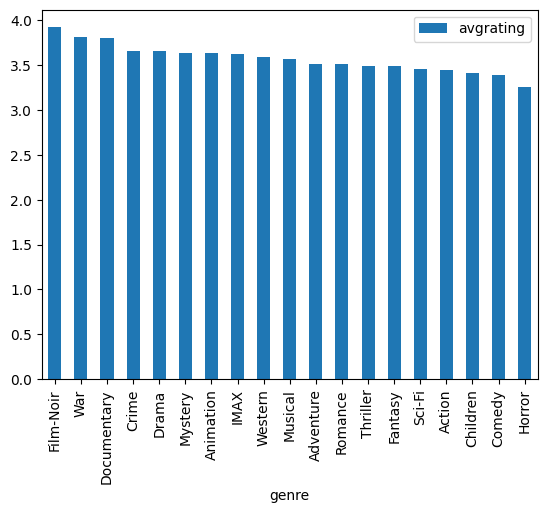

In [ ]:
result_pd.plot(kind="bar", x="genre", y="avgrating")